# Matrix Checks

Ensure that this has the iteration version information added to the file path and run all the way through.

Commentry to be added before each output *replacing the text in italics*

Once run and commented, download as HTML so that it is not dynamic and can be shared with colleagues who do not have Python.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

_TMS_PATH = ('C:/Users/' +
               os.getlogin() +
               '/Documents/GitHub/Travel-Market-Synthesiser')
sys.path.append(_TMS_PATH)
import matrix_processing as mp
import distribution_curve_graph as dcg

pd.set_option('precision', 3)


In [3]:
# Produces distribution report tuples. Note: this takes a few minutes to run
# Needs updating to be able to be flexibly pointed at different output sets
TMS_dist_report = mp.distribution_report(file_drive = 'Y:/',
                                         model_name = 'Norms',
                                         iteration = 'iter4',
                                         model_segments = ['p', 'm', 'ca'],
                                         distributions = 'Distribution Outputs/Compiled PA Matrices',
                                         matrix_format = 'long',
                                         report_tp = 'tp',
                                         internal_reports = True,
                                         write = True)

This report function may not be designed for these matrices
hb_pa_m6_business_ca_tp1.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp2.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp3.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp4.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_nca_tp1.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp2.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp3.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp4.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_commute_ca_tp1.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp2.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp3.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp4.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_nca_tp1.csv
p
hb p commute
m
hb m 6
ca
hb ca 1
hb_pa_m6_commute_nca_tp2.csv
p
hb p commute
m
hb m 6
ca
hb ca 1
hb_pa_m6_commute_nca_tp3.csv
p
hb p 

In [4]:
FE_dist_report = mp.distribution_report(file_drive = 'Y:/',
                                        model_name = 'Norms',
                                        iteration = 'iter4',
                                        model_segments = ['p', 'm', 'ca'],
                                        distributions = 'Fusion Outputs/Compiled Fusion PA Matrices',
                                        matrix_format = 'long',
                                        report_tp = 'tp',
                                        internal_reports = True,
                                        write = True)

This report function may not be designed for these matrices
hb_pa_m6_business_ca_tp1.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp2.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp3.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_ca_tp4.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 2
hb_pa_m6_business_nca_tp1.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp2.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp3.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_business_nca_tp4.csv.csv
p
hb p business
m
hb m 6
ca
hb ca 1
hb_pa_m6_commute_ca_tp1.csv.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp2.csv.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp3.csv.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_ca_tp4.csv.csv
p
hb p commute
m
hb m 6
ca
hb ca 2
hb_pa_m6_commute_nca_tp1.csv.csv
p
hb p commute
m
hb m 6
ca
hb ca 1
hb_pa_m6_commute_nca_tp2.csv.csv
p
hb p commute


In [ ]:
# Join the two models
TMS_dist_report_df = pd.DataFrame(TMS_dist_report[3])
FE_dist_report_df = pd.DataFrame(FE_dist_report[3])

TMS_dist_report_df.loc[:,'ca']=TMS_dist_report_df.loc[:,'ca'].astype('category')
FE_dist_report_df.loc[:,'ca']=FE_dist_report_df.loc[:,'ca'].astype('category')

## Check Matrix totals
Compare matrix totals and purpose splits with existing outputs and NoRMS. This should be done seperately by mode.

*Insert text comparing overall matrix totals. Look back at previous iterations as well*

In [6]:
print("TMS total demand: %.0f" % TMS_dist_report_df.dt.sum())
print("FE total demand:  %.0f" % FE_dist_report_df.dt.sum())

TMS total demand: 423772
FE total demand:  291718


*Text to compare changes at mode-level*

In [7]:
# Code to import 24 hour total matrix from TMS, FE and show with NoRMS in int-ext format
TMS_mode_df=TMS_dist_report_df.set_index('m')
TMS_mode_sum = TMS_mode_df.dt.sum(level=('m'))

FE_mode_df=FE_dist_report_df.set_index('m')
FE_mode_sum = FE_mode_df.dt.sum(level=('m'))

mode_sum = pd.merge(pd.DataFrame(TMS_mode_sum), pd.DataFrame(FE_mode_sum), on="m", suffixes=('_TMS','_FE'))
mode_sum['prop_TMS']=mode_sum.dt_TMS/mode_sum.dt_TMS.sum()
mode_sum['prop_FE']=mode_sum.dt_FE/mode_sum.dt_FE.sum()
mode_sum

,dt_TMS,dt_FE,prop_TMS,prop_FE
m,,,,
6,423772.228,291717.999,1.0,1.0


Compare rail trips by purpose with NTS purpose splits for rail trips

*Insert text comparing rail demand by purpose*

1 is commute. 2 and 12 are Business. Remainder are other? If we can confirm this I can sum to get NTS-Equvialent purposes

In [24]:
TMS_purpose_df = TMS_dist_report_df[TMS_dist_report_df["m"]=="6"]
TMS_purpose_df=TMS_purpose_df.set_index('p')
TMS_purpose_sum = TMS_purpose_df.dt.sum(level=('p'))

FE_purpose_df = FE_dist_report_df[FE_dist_report_df["m"]=="6"]
FE_purpose_df=FE_purpose_df.set_index('p')
FE_purpose_sum = FE_purpose_df.dt.sum(level=('p'))

purpose_sum=pd.merge(pd.DataFrame(TMS_purpose_sum), pd.DataFrame(FE_purpose_sum), on="p", suffixes=('_TMS','_FE'))

purpose_sum['prop_TMS']=purpose_sum.dt_TMS/purpose_sum.dt_TMS.sum()
purpose_sum['prop_FE']=purpose_sum.dt_FE/purpose_sum.dt_FE.sum()
purpose_sum

,dt_TMS,dt_FE,prop_TMS,prop_FE
p,,,,
business,55036.928,46153.549,0.130,0.158
commute,98348.938,76483.051,0.232,0.262
other,270386.362,169081.399,0.638,0.580


In [9]:
NTS = {'purpose': ['Business','Commute','Other'],
      'trips': [617, 4395, 7010]}

NTS_df=pd.DataFrame(NTS)
NTS_df['prop']=NTS_df.trips/NTS_df.trips.sum()

NTS_df

,purpose,trips,prop
0,Business,617,0.051
1,Commute,4395,0.366
2,Other,7010,0.583


In [21]:
TMS_ca_df = TMS_dist_report_df[TMS_dist_report_df["m"]=="6"]
TMS_ca_df=TMS_ca_df.set_index('ca')
TMS_ca_sum = TMS_ca_df.dt.sum(level=('ca'))

FE_ca_df = FE_dist_report_df[FE_dist_report_df["m"]=="6"]
FE_ca_df=FE_ca_df.set_index('ca')
FE_ca_sum = FE_ca_df.dt.sum(level=('ca'))

ca_sum=pd.merge(pd.DataFrame(TMS_ca_sum), pd.DataFrame(FE_ca_sum), on="ca", suffixes=('_TMS','_FE'))

ca_sum['prop_TMS']=ca_sum.dt_TMS/ca_sum.dt_TMS.sum()
ca_sum['prop_FE']=ca_sum.dt_FE/ca_sum.dt_FE.sum()
ca_sum

,dt_TMS,dt_FE,prop_TMS,prop_FE
ca,,,,
2,309017.251,179581.382,0.729,0.717
1,114754.977,70995.910,0.271,0.283


In [22]:
NTS = {'car availability': ['NCA','CA'],
      'trips': [10581, 3420]}

NTS_df=pd.DataFrame(NTS)
NTS_df['prop']=NTS_df.trips/NTS_df.trips.sum()

NTS_df

,car availability,trips,prop
0,NCA,10581,0.756
1,CA,3420,0.244


## Cellwise Comparison
Comparison between TMS and FE outputs

*Insert text on outputs. Consider whether axis limits need changing. If so, change them and rerun*

<function matplotlib.pyplot.show(*args, **kw)>

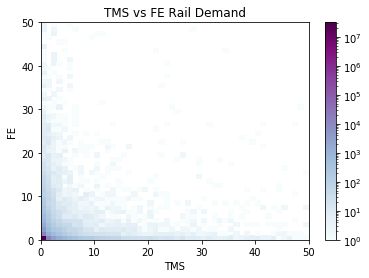

In [34]:
# Code to compare outputs and produce scatterplot with line of best fit

purpose_df = pd.merge(TMS_purpose_df, FE_purpose_df,
                      on=('p', 'a_zone', 'ca', 'm', 'origin', 'p_zone', "time"),
                      suffixes=('_TMS','_FE'))

plt.hist2d(purpose_df.dt_TMS, 
           purpose_df.dt_FE, 
           bins=50, 
           range=[[0,50],[0,50]],
           cmap=plt.cm.BuPu,
           norm=mpl.colors.LogNorm())
plt.colorbar()
plt.title("TMS vs FE Rail Demand")
plt.xlabel("TMS")
plt.ylabel("FE")
#plt.xscale("log")
#plt.yscale("log")
plt.show

## Trip length distribution
The trip length distribution is aiming for a set of NTS targets with a different distribution for each segment. These do not necessarily agregate to a smooth curve.

*Insert text on trip lenth distribution*

In [28]:
# Code to import trip length distributions
dcg.build_dist_curves(mode_subset=['6'],
                     model_name='Norms',
                      iteration='iter4')

Building graphs for 24hr_pa


IndexError: list index out of range

## Matrix values check
Check for extreme values and ensure that they do not represent a problem with the outputs

*Insert text on extreme values. Are the highest 5 to be expected (ie London-London)? Any negatives?*

In [35]:
purpose_df.nsmallest(n=5, columns='dt_TMS')

,a_zone,ca,dt_TMS,m,origin,p_zone,time,dt_FE
p,,,,,,,,
business,921,2,0.0,6,hb,1,1,0.0
business,1095,2,0.0,6,hb,1,1,0.0
business,1096,2,0.0,6,hb,1,1,0.0
business,1097,2,0.0,6,hb,1,1,0.0
business,1098,2,0.0,6,hb,1,1,0.0


In [36]:
purpose_df.nsmallest(n=5, columns='dt_FE')

,a_zone,ca,dt_TMS,m,origin,p_zone,time,dt_FE
p,,,,,,,,
business,921,2,0.0,6,hb,1,1,0.0
business,1095,2,0.0,6,hb,1,1,0.0
business,1096,2,0.0,6,hb,1,1,0.0
business,1097,2,0.0,6,hb,1,1,0.0
business,1098,2,0.0,6,hb,1,1,0.0


In [37]:
purpose_df.nlargest(n=5, columns='dt_TMS')

,a_zone,ca,dt_TMS,m,origin,p_zone,time,dt_FE
p,,,,,,,,
other,765,2,437.114,6,hb,765,2,52.449
other,765,1,412.703,6,hb,765,2,0.194
other,2,2,374.836,6,hb,2,2,2.029
commute,765,2,315.468,6,hb,765,1,43.082
other,1032,2,295.950,6,hb,1032,2,43.204


In [38]:
purpose_df.nlargest(n=5, columns='dt_FE')

,a_zone,ca,dt_TMS,m,origin,p_zone,time,dt_FE
p,,,,,,,,
other,250,2,0.013,6,hb,255,2,168.870
other,765,2,65.504,6,hb,760,2,111.511
other,1026,1,1.269,6,hb,50,2,93.389
other,1051,1,3.981,6,hb,464,2,90.345
business,1025,2,0.134,6,hb,20,1,87.640


## Summary

*Insert text summarising matrix comparison*